In [1]:
from modules.polyfit import Polyfit
from modules.paramtune import Paramtune
import jax.numpy as jnp
summer_fits = Polyfit('summer_data/fits.npz', input_h5='summer_data/inputdata.h5', order=3, covariance = True, num_bins = 350)

Filtering 782 bins for invalid input
Fitting 351 of 133561: /ATLAS_2019_I1736531/d06-x01-y01[AUX_mur0.5_muf1]#0         


In [2]:
target_bins = ['/ATLAS_2019_I1736531/d01-x01-y01#0', '/ATLAS_2019_I1736531/d01-x01-y01#1',\
               '/ATLAS_2019_I1736531/d02-x01-y01#0','/ATLAS_2019_I1736531/d02-x01-y01#1']
target_values = jnp.array([1.0401, 1.1434, 1.0936, 1.261])
target_errors = jnp.array([0.0276, 0.0393, 0.0284, 0.0118])
summer_tune = Paramtune('summer_data/fits.npz', 'summer_data/allrivetdata.json', covariance = False,
    target_bins = target_bins, target_values = target_values, target_errors = target_errors)
summer_tune_cov = Paramtune('summer_data/fits.npz', 'summer_data/allrivetdata.json', covariance = True,
    target_bins = target_bins, target_values = target_values, target_errors = target_errors)
target_binidns = jnp.array([0,1,8,9])
summer_tune = Paramtune('summer_data/fits.npz', 'summer_data/allrivetdata.json', covariance = False,
    target_h5 = 'summer_data/HEPData-ins1736531-v1-csv.h5', target_binidns = target_binidns)
summer_tune_more_cov = Paramtune('summer_data/fits.npz', 'summer_data/allrivetdata.json', covariance = True,
    target_h5 = 'summer_data/HEPData-ins1736531-v1-csv.h5', target_binidns = target_binidns)


[ 0  1 63 64]
[1.0401 1.1434 1.0936 1.261 ] [0.0276 0.0393 0.0284 0.0118]
Calculated inital guess:  [0.12639877]
Tuned Parameters:  [0.12683569] , Objective =  16.21767952663498 , chi2/ndf =  5.4058931755449935
Covariance of Tuned Parameters:  [[3.25134381e-07]]
[ 0  1 63 64]
[1.0401 1.1434 1.0936 1.261 ] [0.0276 0.0393 0.0284 0.0118]
Calculated inital guess:  [0.12639877]
Tuned Parameters:  [0.12665194] , Objective =  6.129725646470321 , chi2/ndf =  2.043241882156774
Covariance of Tuned Parameters:  [[3.68228288e-07]]
[1.0936 1.261  1.0401 1.1434] [0.02448469 0.09509995 0.02279254 0.02720643]
Calculated inital guess:  [0.12483235]
Tuned Parameters:  [0.12520445] , Objective =  72.55619328497231 , chi2/ndf =  24.185397761657438
Covariance of Tuned Parameters:  [[1.72823872e-06]]
[1.0936 1.261  1.0401 1.1434] [0.02448469 0.09509995 0.02279254 0.02720643]
Calculated inital guess:  [0.12639877]
Tuned Parameters:  [0.12695999] , Objective =  34.04100044560655 , chi2/ndf =  11.3470001485355

In [5]:
target_binidns = jnp.array(range(40))
summer_tune_more = Paramtune('summer_data/fits.npz', 'summer_data/allrivetdata.json', covariance = False,
    tune = False, target_h5 = 'summer_data/HEPData-ins1736531-v1-csv.h5', target_binidns = target_binidns)
summer_tune_more_cov = Paramtune('summer_data/fits.npz', 'summer_data/allrivetdata.json', covariance = True,
    tune = False, target_h5 = 'summer_data/HEPData-ins1736531-v1-csv.h5', target_binidns = target_binidns)
graph_range = [0.1, 0.15]
summer_tune_more.graph_envelope_target()

summer_tune_more.graph_objective(graph_range = graph_range)
summer_tune_more_cov.graph_objective(new_figure = False, graph_range = graph_range)

[ 1.0936  1.261   1.4708  1.7095  1.89    2.174   2.47    3.051   1.0401
  1.1434  1.2762  1.4341  1.5569  1.6412  1.871   2.334   1.4008  1.6348
  1.9362  2.3156  2.605   3.      3.535   4.695   0.8092  0.9118  1.0205
  1.1339  1.177   1.2731  1.357   1.465   1.2145  1.6959  2.5076  3.7421
  4.935   6.635   9.915  16.707 ] [0.02448469 0.09509995 0.03273652 0.05053969 0.09       0.0523832
 0.06       0.08185964 0.02279254 0.02720643 0.02792741 0.06520805
 0.04904212 0.04724923 0.12141664 0.06694774 0.02898224 0.10076815
 0.04138949 0.09186174 0.08788629 0.08831761 0.09038252 0.13687951
 0.02095972 0.02134549 0.02843326 0.02643899 0.04076763 0.030436
 0.02988311 0.04635731 0.0291     0.03099258 0.03954706 0.05375295
 0.07540557 0.11085576 0.15506128 0.53777784]
[ 1.0936  1.261   1.4708  1.7095  1.89    2.174   2.47    3.051   1.0401
  1.1434  1.2762  1.4341  1.5569  1.6412  1.871   2.334   1.4008  1.6348
  1.9362  2.3156  2.605   3.      3.535   4.695   0.8092  0.9118  1.0205
  1.1339  

TypeError: graph_envelope_target() got an unexpected keyword argument 'graph_range'

target deviation 3.5267, with confidence level 0.6827, edof 3.0000
target deviation 3.5267, with confidence level 0.6827, edof 3.0000


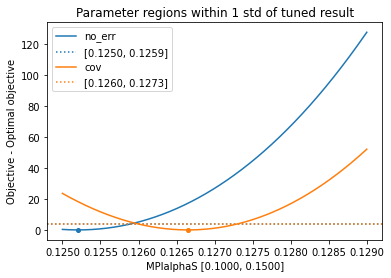

In [ ]:

graph_range = [0.125,0.129]
summer_tune.graph_objective(graph_range = graph_range)
summer_tune_cov.graph_objective(new_figure = False, graph_range = graph_range)

[0, 1, 2, 3, 4, 5, 6]

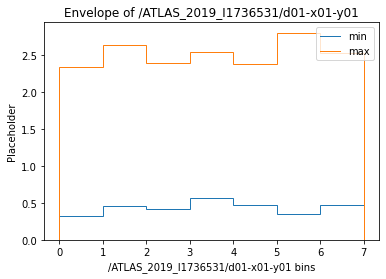

In [ ]:
summer_tune.fits.graph_envelope('/ATLAS_2019_I1736531/d01-x01-y01')
summer_tune.fits.index['/ATLAS_2019_I1736531/d01-x01-y01']

TypeError: dot_general requires contracting dimensions to have the same shape, got (0,) and (4,).

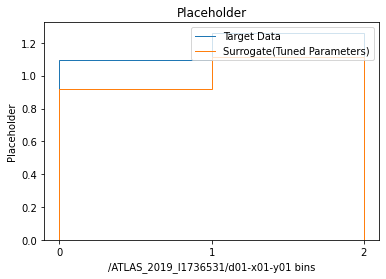

In [ ]:
summer_tune.graph_tune('/ATLAS_2019_I1736531/d01-x01-y01')
summer_tune.graph_tune('/ATLAS_2019_I1736531/d02-x01-y01')
summer_tune.graph_envelope_target()